<a href="https://colab.research.google.com/github/lfhillesheim/statistics_py/blob/main/statistics_py/notebooks/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Trabalho de Análise Descritiva de um Conjunto de Dados

Análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vou construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.


# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Variáveis utilizadas



> #### Fonte dos Dados

 https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm


> #### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> #### Idade
> ***

Idade do morador na data de referência em anos.

> #### Altura (elaboração própria)
> ***

Altura do morador em metros.

> #### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> #### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> #### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> #### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importação das Bibliotecas


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [7]:
url_data = 'https://raw.githubusercontent.com/lfhillesheim/statistics_py/main/data/data.csv'
dados_aux = pd.read_csv(url_data)

In [10]:
dados = dados_aux

### Vizualizando o conteúdo do DataFrame

In [11]:
display(dados.head(3))
display(dados.tail(3))

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


### Para avaliarmos o comportamento da variável RENDA, vou construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considerei que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.


### 1º Definir os intevalos das classes em reais (R$)

In [12]:
sm = 788
classes = [
           dados.Renda.min(),
           2 * sm,
           5 * sm,
           15 * sm,
           25 * sm,
           dados.Renda.max()
]

In [13]:
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [14]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [15]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True
      )
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [16]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True
      ), normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [17]:
dist_freq_renda = pd.DataFrame(
    {'Frequencia' : frequencia, 'Percentagem (%)': percentual}
)

dist_freq_renda.sort_index(ascending = False)

,Frequencia,Percentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

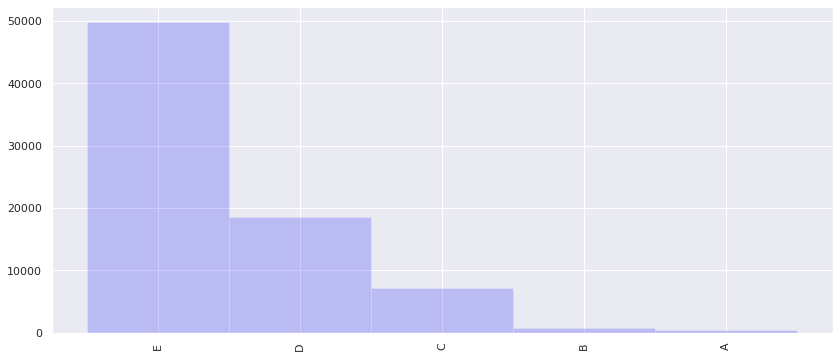

In [52]:
dist_freq_renda['Frequencia'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14,6))

> ### Conclusões


### Histograma para ver as variáveis QUANTITATIVAS do nosso dataset


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


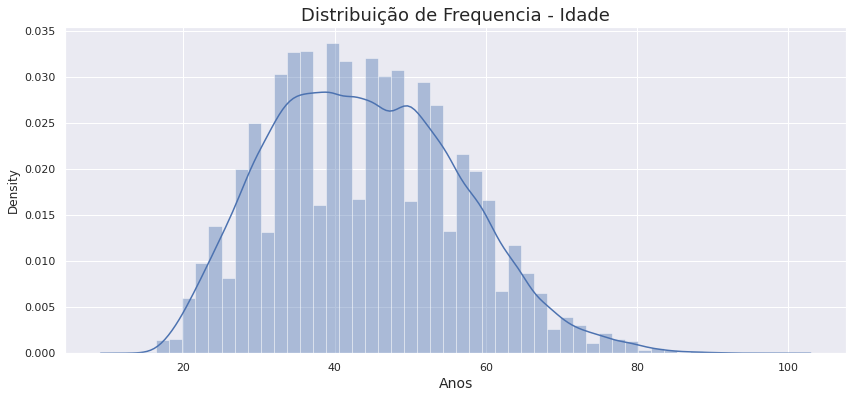

In [51]:
ax = sns.distplot(dados['Idade'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequencia - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [ ]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequencia - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


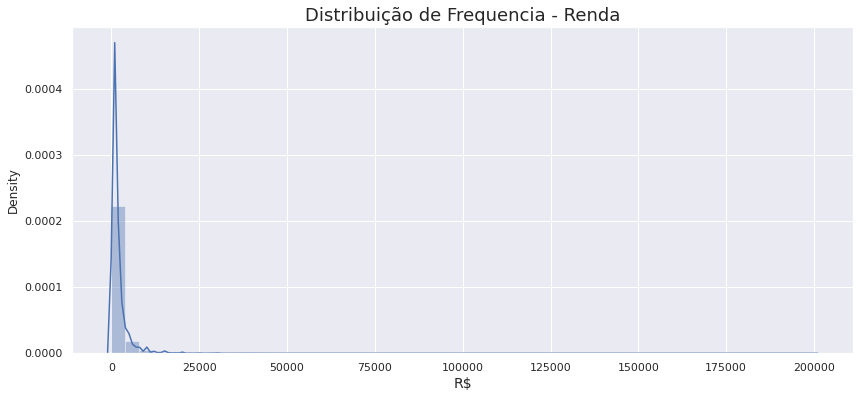

In [50]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequencia - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões


### Para a variável RENDA, construi um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


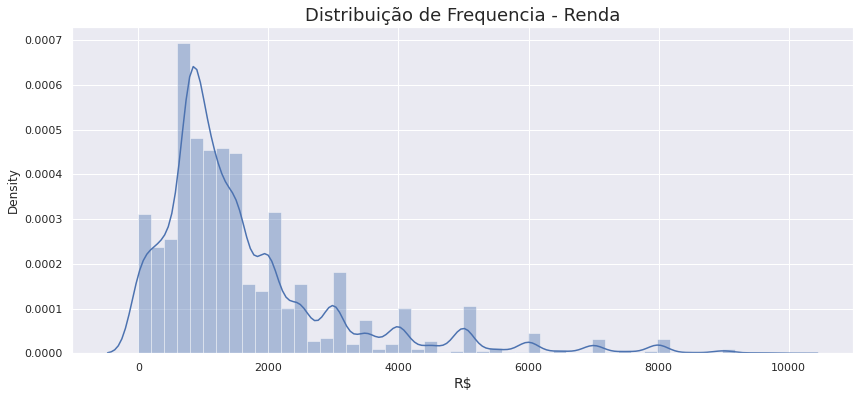

In [49]:
ax = sns.distplot(dados.query('Renda < 10000')['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequencia - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

### Construi uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR


In [65]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
ufs = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [24]:
frequencia  = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [25]:
percentual  = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões


## Para a variável RENDA, farei uma análise descritiva

### Obtendo a média aritimética

In [26]:
dados.Renda.mean()

2000.3831988547631

In [27]:
dados.query('Renda < 15000').Renda.mean()

1765.1139325487718

### Obtenha a mediana

In [28]:
dados.Renda.median()

1200.0

In [29]:
dados.query('Renda < 15000').Renda.median()

1200.0

### Obtendo a moda

In [30]:
dados.Renda.mode()[0]

788

### Obtendo o desvio médio absoluto

In [31]:
dados.Renda.mad()

1526.4951371644931

In [32]:
dados.query('Renda < 15000').Renda.mad()

1211.493804855997

### Obtendo a variância

In [33]:
dados.Renda.var()

11044906.00622118

In [34]:
dados.query('Renda < 15000').Renda.var()

3499386.8981622937

### Obtendo o desvio-padrão

In [35]:
dados.Renda.std()

3323.3877303470294

In [36]:
dados.query('Renda < 15000').Renda.std()

1870.6648278519308

### Obtendo a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [38]:
renda_estatisticas_por_sexo_cor = pd.crosstab(
    dados.Cor,
    dados.Sexo,
    values = dados.Renda,
    aggfunc = {'mean', 'median', 'max', 'mad', 'var' , 'std'}
)

renda_estatisticas_por_sexo_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_cor

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 12 columns]

> ### Conclusões


### Construa um box plot da variável RENDA segundo SEXO e COR

#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

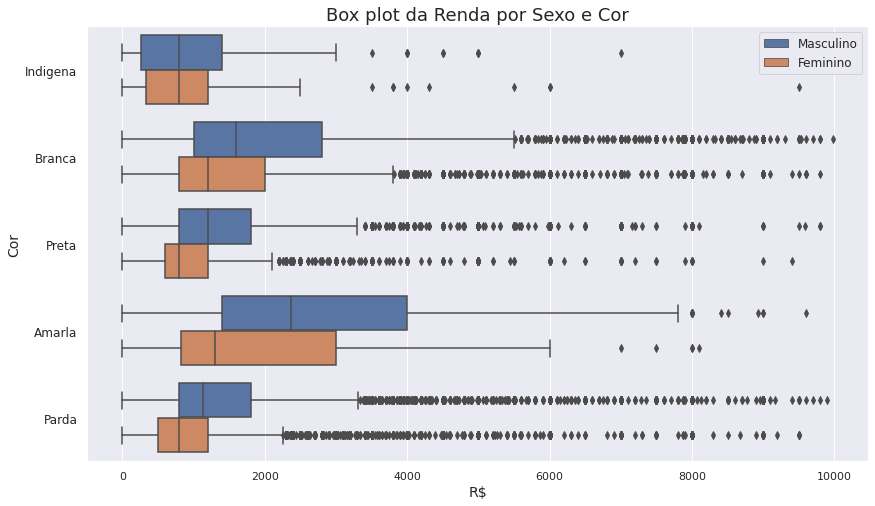

In [48]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue='Sexo', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box plot da Renda por Sexo e Cor', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indigena', 'Branca', 'Preta', 'Amarla', 'Parda', 'Sem declaração'],fontsize=12)

handles,  _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax


> ### Conclusões

Escreva suas conclusões aqui...


### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [54]:
from scipy import stats

In [57]:
percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [59]:
valor = dados.Renda.quantile(.99)
print("R${0:.2f}".format(valor))

R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [61]:
renda_estatisticas_por_sexo_estudo = pd.crosstab(
    dados['Anos de Estudo'],
    dados.Sexo,
    values = dados.Renda.round(2),
    aggfunc = {'mean', 'median', 'max', 'mad', 'var' , 'std'}
)

renda_estatisticas_por_sexo_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_estudo

mad  ...           var
Sexo                              Masculino  ...      Feminino
Anos de Estudo                               ...              
Sem instrução e menos de 1 ano   560.575945  ...  4.087192e+05
1 ano                            584.030039  ...  1.808732e+05
2 anos                           592.273915  ...  2.482373e+05
3 anos                           696.385914  ...  1.798815e+05
4 anos                           750.225818  ...  3.963375e+05
5 anos                           714.913737  ...  4.042196e+05
6 anos                           759.470498  ...  3.301043e+05
7 anos                           720.454779  ...  3.624498e+05
8 anos                           848.818306  ...  8.042165e+05
9 anos                           774.892546  ...  9.471604e+05
10 anos                          985.056140  ...  3.851591e+05
11 anos                         1166.362641  ...  3.308908e+06
12 anos                         1417.123151  ...  2.354029e+07
13 anos                         1869.878195  ...  4.218052e+06
14 anos                         2281.501265  ...  4.260440e+06
15 anos ou mais                 4205.577658  ...  1.774744e+07
Não determinados                 614.090703  ...  2.115871e+05

[17 rows x 12 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

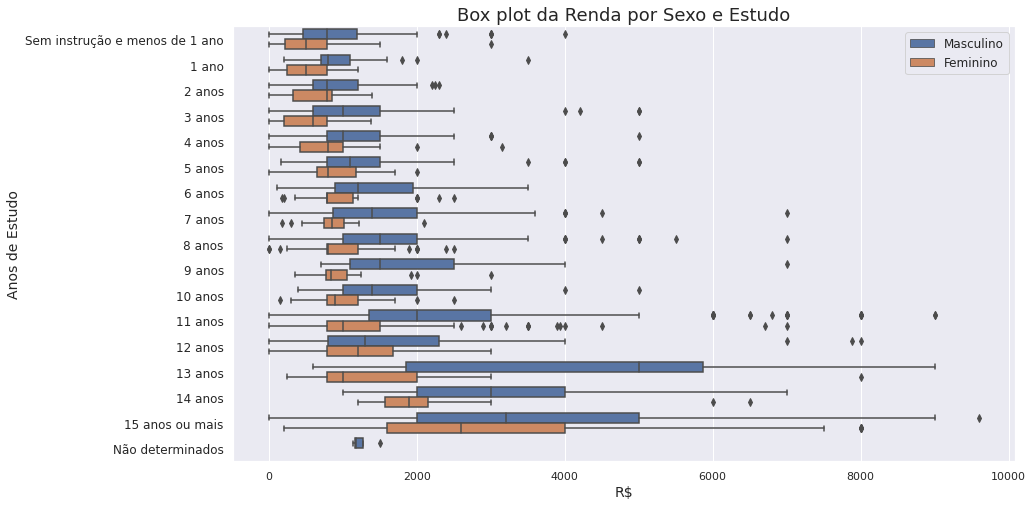

In [62]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue='Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box plot da Renda por Sexo e Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([key for key in anos_de_estudo.values()],fontsize=12)

handles,  _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize=12)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [67]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max' , 'std' ]})
renda_estatisticas_por_uf = renda_estatisticas_por_uf.rename(index = ufs)
renda_estatisticas_por_uf

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

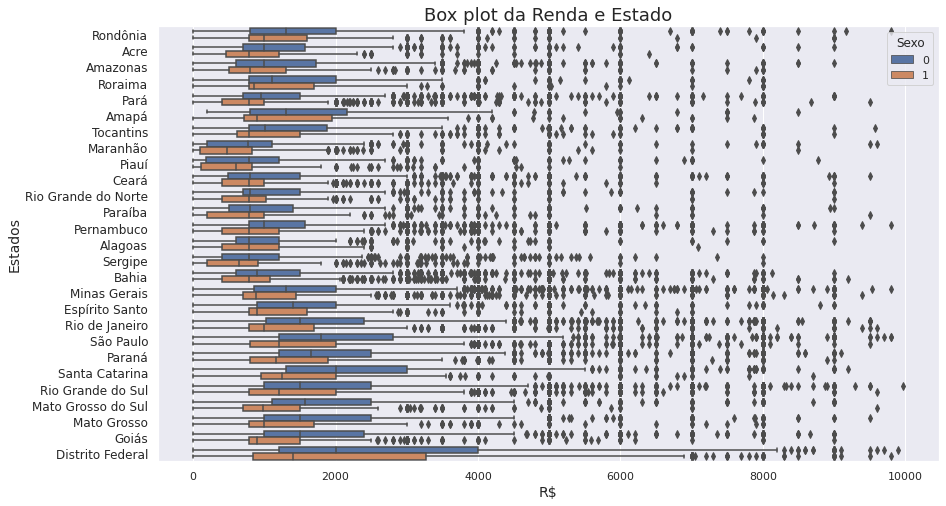

In [69]:
ax = sns.boxplot(x = 'Renda', y = 'UF', hue='Sexo', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box plot da Renda e Estado', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)
ax.set_yticklabels([key for key in uf.values()],fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...